<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_13_Softmax_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-4. Deep Learning 기초 : Softmax Classification

>## [예제3-13] Softmax Classification (TensorFlow)

>### Load modules

In [1]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
x_input = np.array([ [1, 1],  [2, 2.5],  [2.5, 1.3],  [4.3, 9.5],  [5.5, 7.0], [6, 8.2],   [7, 5],    [8, 6],   [9, 4.5]], dtype=np.float)
if 1:
  labels = np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0],   [0, 1, 0],   [0, 1, 0],  [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1]], dtype=np.float)
else: # 다시..
  labels_tmp = np.array( [0, 0, 0, 1, 1, 1, 2, 2, 2] )
  labels = tf.one_hot(labels_tmp, depth=3, on_value=True, off_value=False, dtype=float32).eval()
  print(labels)

> ### Placeholder

In [0]:
n_var = 2
n_class = 3

x_ph = tf.placeholder(tf.float32, (None, n_var), name="input")
labels_ph = tf.placeholder(tf.float32, (None, n_class), name="labels")

>### Activation Function : Softmax Function
>$S(y_{i}) = \frac{e^{y_{i}}}{\sum_{j=0}^{m-1}e^{y_{j}}}$
>## Hypothesis
>## $H(X) = S(XW+B)$

In [0]:
W = tf.Variable(tf.random.normal((n_var, n_class)), dtype=tf.float32, name="weight")
B = tf.Variable(tf.random.normal((1, n_class)), dtype=tf.float32, name="bias")

logits = tf.matmul(x_ph, W) + B
hypothesis = tf.nn.softmax(logits)

>## Cost Function : Cross Entropy Error
>## $cost(W,b) = -\sum_{i=1}^{m}p_{i}\log_{2}q_{i}$

In [0]:
#cost = tf.reduce_mean(-tf.reduce_sum(labels_ph * tf.log(hypothesis), axis=1)) 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels_ph))

>### Optimizer : tf.train.GradientDescentOptimizer (Gradient Descent Optimizer)

In [0]:
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

>### 학습 준비 과정

In [0]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

### 학습 (Training)

In [10]:
# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_graph[0] = sess.run((cost), feed_dict={x_ph: x_input, labels_ph: labels})
print("[{:>5}] cost = {:>10.4}".format(0, cost_graph[0]))
for cnt_training in range(1, N_training+1):
    cost_res, _ = sess.run((cost, train), feed_dict={x_ph: x_input, labels_ph: labels})
    cost_graph[cnt_training] = cost_res
    if cnt_training % 1000 == 0:
        print("[{:>5}] cost = {:>10.4}".format(cnt_training, cost_graph[cnt_training]))



print(np.argmax(sess.run(hypothesis, feed_dict={x_ph:x_input}), axis=1))

x_test = np.array([[5.5, 5], [4.7, 10.0], [9, 3.1]])
print(np.argmax(sess.run(hypothesis, feed_dict={x_ph:x_test}), axis=1))

[    0] cost =      9.663
[ 1000] cost =     0.3549
[ 2000] cost =     0.1778
[ 3000] cost =     0.1145
[ 4000] cost =    0.08381
[ 5000] cost =    0.06595
[ 6000] cost =    0.05433
[ 7000] cost =    0.04619
[ 8000] cost =    0.04017
[ 9000] cost =    0.03555
[10000] cost =    0.03188
[11000] cost =    0.02891
[12000] cost =    0.02644
[13000] cost =    0.02437
[14000] cost =     0.0226
[15000] cost =    0.02107
[16000] cost =    0.01974
[17000] cost =    0.01857
[18000] cost =    0.01753
[19000] cost =     0.0166
[20000] cost =    0.01577
[21000] cost =    0.01502
[22000] cost =    0.01433
[23000] cost =    0.01371
[24000] cost =    0.01314
[25000] cost =    0.01262
[26000] cost =    0.01213
[27000] cost =    0.01168
[28000] cost =    0.01127
[29000] cost =    0.01088
[30000] cost =    0.01052
[31000] cost =    0.01019
[32000] cost =   0.009869
[33000] cost =   0.009573
[34000] cost =   0.009293
[35000] cost =    0.00903
[36000] cost =   0.008782
[37000] cost =   0.008547
[38000] cost

>### Plotting

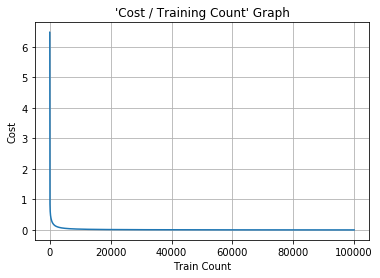

In [9]:
# Training 상황에 대한 그래프 출력
# 1)Training 회수 별 Cost 값
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)

plt.show()